Scikit-learn HistGradientBoostingRegressor() model on MDA_dataframeArthur.csv.

Time Series cross-validation: 24h delay for weather, 1 month gap between train and test sets.
MAE en RMSE can be compared to other models.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

Dataframe from MDA_merge_data.ipynb is loaded, datetime column is dropped in order to run model.

In [2]:
df = pd.read_csv("C:\\Users\Arthur\hello\MDA_dataframeArthur.csv")
df_nd = df.drop('result_timestamp', axis=1)

In [3]:
# Drop the datetime column
df_nd = df.drop('result_timestamp', axis=1)

The target dataset (y) and predictor dataset (X) are created. For y, noise is converted to relative noise (proportion of max value)

In [4]:
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [5]:
#convert noise to relative noise (or relative crowdedness) as target (y), create dataframe with predictors only (X)
y = df_nd["laeq"] / df_nd["laeq"].max()
X = df_nd.drop("laeq", axis="columns")

In [6]:
#create time-sensitive split for cross-validation
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=4320,
    max_train_size=10000,
    test_size=1000,
)

In [7]:
#inspect splits
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]
X.iloc[test_0]
X.iloc[train_0]

,Unnamed: 0,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
32951,33059,14,4,19,8,0,52.0,15.73,32.0,437.0,0.0,0.0,-8.0,0.08,373.0,26.25,26.25,26.193,25.146406
32952,33060,14,4,19,8,0,50.0,15.36,32.0,469.0,0.0,0.0,171.0,0.02,230.0,26.53,26.53,26.473,25.640656
32953,33061,14,4,19,8,0,50.0,15.61,31.0,470.0,0.0,0.0,143.0,0.36,228.0,27.05,27.05,26.993,26.296341
32954,33062,14,4,19,8,0,50.0,15.90,32.0,269.0,0.0,0.0,105.0,0.39,297.0,27.31,27.31,27.253,26.501806
32955,33063,14,4,19,8,0,51.0,16.22,31.0,187.0,0.0,0.0,144.0,0.07,397.0,27.32,27.32,27.263,26.213027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42946,43068,2,4,28,10,0,91.0,13.00,38.0,0.0,0.0,0.0,0.0,0.00,0.0,14.39,14.39,14.333,14.198870
42947,43069,2,4,28,10,0,90.0,12.83,37.0,0.0,0.0,0.0,-102.0,0.00,0.0,14.39,14.39,14.333,14.185340
42948,43070,2,4,28,10,0,90.0,12.78,38.0,0.0,0.0,0.0,0.0,0.00,0.0,14.39,14.39,14.333,14.206740
42949,43071,2,4,28,10,0,90.0,12.78,37.0,0.0,0.0,0.0,-92.0,0.04,0.0,14.39,14.39,14.333,14.314940


In [8]:
train_4, test_4 = all_splits[4]
X.iloc[test_4]
X.iloc[train_4]

,Unnamed: 0,hour,day,day_of_month,month,weekend,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
36951,37061,9,4,16,9,0,84.0,13.90,32.0,163.0,0.0,0.0,59.0,0.03,117.0,16.59,16.59,16.533,16.339917
36952,37062,9,4,16,9,0,82.0,13.60,32.0,210.0,0.0,0.0,-172.0,0.02,127.0,16.78,16.78,16.723,16.384344
36953,37063,9,4,16,9,0,79.0,13.46,31.0,165.0,0.0,0.0,98.0,0.04,134.0,17.07,17.07,17.013,16.527561
36954,37064,9,4,16,9,0,79.0,13.63,32.0,144.0,0.0,0.0,-6.0,0.03,139.0,17.31,17.31,17.253,16.762182
36955,37065,9,4,16,9,0,80.0,14.00,32.0,142.0,0.0,0.0,27.0,0.02,161.0,17.49,17.49,17.433,16.968314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46946,47083,23,3,24,11,0,86.0,6.88,37.0,0.0,0.0,0.0,-81.0,0.12,0.0,9.11,9.11,9.053,9.123540
46947,47084,23,3,24,11,0,86.0,6.92,38.0,0.0,0.0,0.0,26.0,0.03,0.0,9.17,9.17,9.113,9.154146
46948,47085,23,3,24,11,0,85.0,6.81,37.0,0.0,0.0,0.0,36.0,0.21,0.0,9.22,9.22,9.163,9.262167
46949,47086,23,3,24,11,0,85.0,6.78,38.0,0.0,0.0,0.0,78.0,0.13,0.0,9.22,9.22,9.163,9.232913


In [31]:
# grid search for hyperparameter tuning
param_grid = {
    'learning_rate': (0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17),
    'max_leaf_nodes': (14, 15, 16, 17, 18)}
model = HistGradientBoostingRegressor()
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=ts_cv)
model_grid_search.fit(X, y)


GridSearchCV(cv=TimeSeriesSplit(gap=4320, max_train_size=10000, n_splits=5, test_size=1000),
             estimator=HistGradientBoostingRegressor(), n_jobs=2,
             param_grid={'learning_rate': (0.09, 0.1, 0.11, 0.12, 0.13, 0.14,
                                           0.15, 0.16, 0.17),
                         'max_leaf_nodes': (14, 15, 16, 17, 18)})

In [32]:
accuracy = model_grid_search.score(X, y)
print(
    f"The test accuracy score of the grid-searched pipeline is: "
    f"{accuracy:.2f}"
)

The test accuracy score of the grid-searched pipeline is: 0.85


In [33]:
model_grid_search.predict(X.iloc[0:5])

array([0.49326872, 0.49326872, 0.49326872, 0.49326872, 0.49281058])

In [34]:
print(f"The best set of parameters is: "
      f"{model_grid_search.best_params_}")

The best set of parameters is: {'learning_rate': 0.13, 'max_leaf_nodes': 17}


In [35]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.856040,0.064042,0.013766,0.001164,0.13,17,"{'learning_rate': 0.13, 'max_leaf_nodes': 17}",0.740383,0.705982,0.598674,0.692044,0.239242,0.595265,0.184091,1
14,1.059027,0.055531,0.014874,0.001207,0.11,18,"{'learning_rate': 0.11, 'max_leaf_nodes': 18}",0.722985,0.676892,0.643654,0.714307,0.198569,0.591282,0.198381,2
27,0.730580,0.027747,0.013771,0.001687,0.14,16,"{'learning_rate': 0.14, 'max_leaf_nodes': 16}",0.719329,0.675759,0.574133,0.721476,0.257845,0.589708,0.174324,3
12,0.799876,0.016456,0.012566,0.000798,0.11,16,"{'learning_rate': 0.11, 'max_leaf_nodes': 16}",0.707088,0.698875,0.593390,0.730830,0.169236,0.579884,0.210684,4
34,0.845302,0.039346,0.013068,0.000485,0.15,18,"{'learning_rate': 0.15, 'max_leaf_nodes': 18}",0.679400,0.635734,0.640453,0.712711,0.227523,0.579164,0.178039,5


In [36]:
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [37]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,param_learning_rate,param_max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
23,0.13,17,0.595265,0.184091,1
14,0.11,18,0.591282,0.198381,2
27,0.14,16,0.589708,0.174324,3
12,0.11,16,0.579884,0.210684,4
34,0.15,18,0.579164,0.178039,5
7,0.1,16,0.578410,0.189020,6
36,0.16,15,0.576280,0.189234,7
13,0.11,17,0.573811,0.207969,8
15,0.12,14,0.571944,0.222000,9
30,0.15,14,0.571253,0.196458,10


In [38]:
pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["param_learning_rate"],
    columns=["param_max_leaf_nodes"])

pivoted_cv_results

param_max_leaf_nodes,14,15,16,17,18
param_learning_rate,,,,,
0.09,0.538564,0.535876,0.557376,0.553055,0.561494
0.10,0.537939,0.559323,0.578410,0.545297,0.552582
0.11,0.537613,0.547014,0.579884,0.573811,0.591282
0.12,0.571944,0.548509,0.548177,0.550189,0.568512
0.13,0.542894,0.550688,0.541815,0.595265,0.560472
0.14,0.555525,0.568690,0.589708,0.554627,0.537104
0.15,0.571253,0.550510,0.561139,0.512863,0.579164
0.16,0.531868,0.576280,0.535163,0.543436,0.539150
0.17,0.548883,0.556245,0.554370,0.557170,0.547163


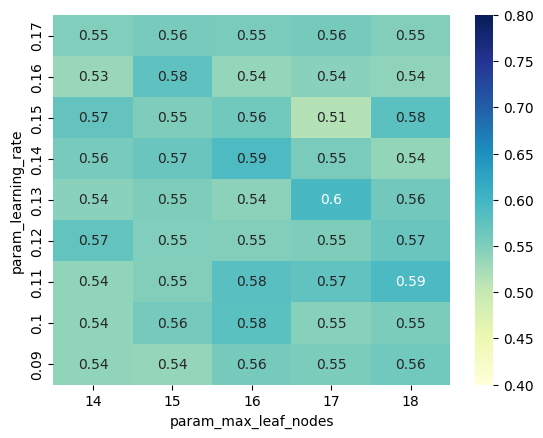

In [39]:
import seaborn as sns

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.4,
                 vmax=0.8)
ax.invert_yaxis()

In [40]:
#run histogram gradient boosting model
def evaluate(model, X, y, cv):
    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"],
    )
    mae = -cv_results["test_neg_mean_absolute_error"]
    rmse = -cv_results["test_neg_root_mean_squared_error"]
    print(
        f"Mean Absolute Error:     {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"Root Mean Squared Error: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )

gbrt_pipeline = make_pipeline(HistGradientBoostingRegressor(max_leaf_nodes=17,learning_rate=0.13)).set_output(transform="pandas")

evaluate(gbrt_pipeline, X, y, cv=ts_cv)

Mean Absolute Error:     0.038 +/- 0.010
Root Mean Squared Error: 0.048 +/- 0.010


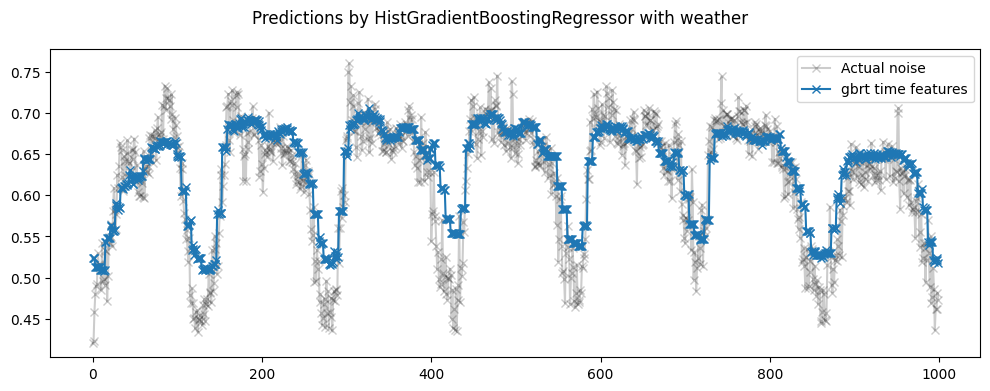

In [41]:
#Qualitative analysis of the impact of features on linear model predictions
gbrt_pipeline.fit(X.iloc[train_0], y.iloc[train_0])
gbrt_predictions = gbrt_pipeline.predict(X.iloc[test_0])

last_hours = slice(-1000, None)
fig, ax = plt.subplots(figsize=(12, 4))
fig.suptitle("Predictions by HistGradientBoostingRegressor with weather")
ax.plot(
    y.iloc[test_0].values[last_hours],
    "x-",
    alpha=0.2,
    label="Actual noise",
    color="black",
)
ax.plot(gbrt_predictions[last_hours], "x-", label="gbrt time features")
_ = ax.legend()


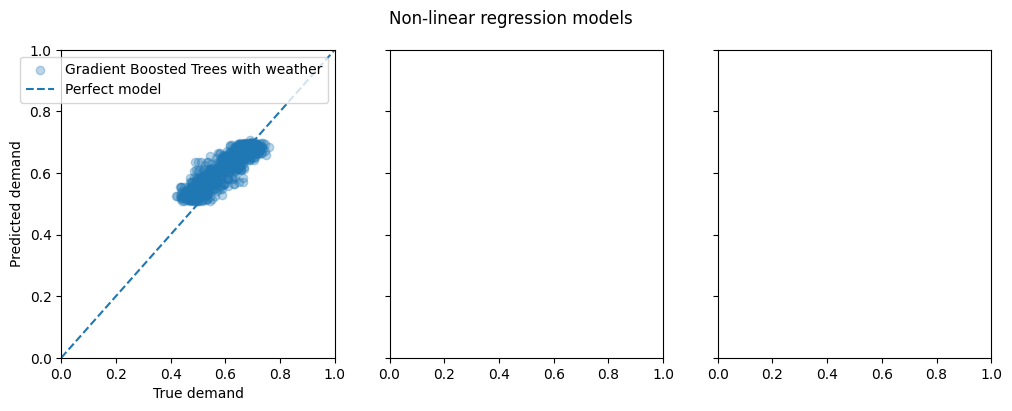

In [42]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
fig.suptitle("Non-linear regression models")
predictions = [
    gbrt_predictions,
]
labels = [
    "Gradient Boosted Trees with weather",
]
for ax, pred, label in zip(axes, predictions, labels):
    ax.scatter(y.iloc[test_0].values, pred, alpha=0.3, label=label)
    ax.plot([0, 1], [0, 1], "--", label="Perfect model")
    ax.set(
        xlim=(0, 1),
        ylim=(0, 1),
        xlabel="True demand",
        ylabel="Predicted demand",
    )
    ax.legend()

plt.show()